# Importing all necessary 

In [1]:
import torch
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip
from torchvision.transforms.functional import InterpolationMode
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import models
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

#  Data Transformation:

In [2]:
train_transform = transforms.Compose([
    RandomRotation(degrees=15, interpolation=InterpolationMode.BILINEAR),  # Equivalent to rotation_range=15 in Keras
    RandomHorizontalFlip(p=0.5),  # Equivalent to horizontal_flip=True in Keras
    RandomVerticalFlip(p=0.0),  # Equivalent to vertical_flip=False in Keras
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


These transformations are designed to prepare image data for machine learning tasks. During training (train_transform), 
images undergo random rotation (up to 15 degrees) and horizontal flipping (with a 50% probability) to augment the dataset,
enhancing model robustness. Vertical flipping is not applied in this case. Images are then converted to PyTorch tensors and 
normalized with a mean and standard deviation of (0.5, 0.5, 0.5) across each channel. Similarly, during testing (test_transform)
, images are transformed into tensors and normalized using the same mean and standard deviation to maintain consistency. These
transformations are essential for preprocessing data and improving model performance, especially in deep learning tasks 
involving image classification or object detection.







# Loading Dataset

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


It sets up data loaders for the CIFAR-10 dataset using PyTorch's torchvision module. For the training dataset, CIFAR-10 data is loaded into trainset, with specified transformations applied using train_transform, and then batched into groups of 32 samples with shuffling enabled to improve learning. Similarly, the test dataset is loaded into testset with transformations applied using test_transform, and batched into groups of 32 samples for testing purposes. These data loaders streamline the process of feeding data into the neural network model during both training and testing phases, abstracting away complexities associated with data handling and ensuring consistency in preprocessing steps between training and testing datasets.

# Defining ResNet Model

In [4]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)

    def forward(self, x):
        return self.resnet(x)

model_resnet = ResNet()

C:\Users\pbaniya\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\pbaniya\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


It defines a custom neural network architecture called ResNet, implemented as a subclass of nn.Module in PyTorch. Within the constructor (__init__ method), the ResNet architecture is instantiated using models.resnet18(pretrained=True), loading a pre-trained ResNet-18 model from PyTorch's models module. The fully connected layer (fc) of the ResNet model is replaced with a new nn.Linear layer, adapting the number of output features to match the number of classes in the CIFAR-10 dataset (in this case, 10 classes). During the forward pass (forward method), input data x is passed through the ResNet architecture, and the output is returned. Lastly, an instance of the ResNet class is created and assigned to the variable model_resnet, effectively creating a ResNet model adapted for the CIFAR-10 dataset. This model can then be trained and evaluated for image classification tasks on the CIFAR-10 dataset.














# Optimizer Configuration: Adam(learning_rate=0.0001)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.0001)

We use CrossEntropyLoss function, which is suitable for multi-class classification tasks like CIFAR-10. It also sets up the Adam optimizer to update the parameters of the ResNet model during training, with a learning rate of 0.0001. These components are crucial for training the model effectively, as the loss function computes the discrepancy between predicted and actual class labels, while the optimizer adjusts the model parameters to minimize this loss, enabling efficient learning on the CIFAR-10 dataset.

# Training the model

In [6]:
num_epochs = 10
train_losses = []
train_accuracy = []

for epoch in range(num_epochs):
    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model_resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total

    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

Epoch [1/10], Loss: 1.1469, Accuracy: 60.15%
Epoch [2/10], Loss: 0.7953, Accuracy: 72.66%
Epoch [3/10], Loss: 0.6765, Accuracy: 76.65%
Epoch [4/10], Loss: 0.5985, Accuracy: 79.50%
Epoch [5/10], Loss: 0.5407, Accuracy: 81.31%
Epoch [6/10], Loss: 0.4964, Accuracy: 82.83%
Epoch [7/10], Loss: 0.4549, Accuracy: 84.17%
Epoch [8/10], Loss: 0.4189, Accuracy: 85.69%
Epoch [9/10], Loss: 0.3913, Accuracy: 86.42%
Epoch [10/10], Loss: 0.3623, Accuracy: 87.47%
Finished Training


In this training process, we're teaching our ResNet model to recognize images from the CIFAR-10 dataset over 10 rounds, or epochs. For each round, we divide the dataset into smaller batches and run our model on each batch, adjusting its settings based on how well it's performing. We keep track of two main things: how close our guesses are to the actual answers (the loss), and how many images our model gets right (the accuracy). After each round, we note down the average loss and accuracy. Once we've done this for all 10 rounds, we've finished training our model. It's now ready to use for recognizing objects in images!

# Plotting loss and Accuracy

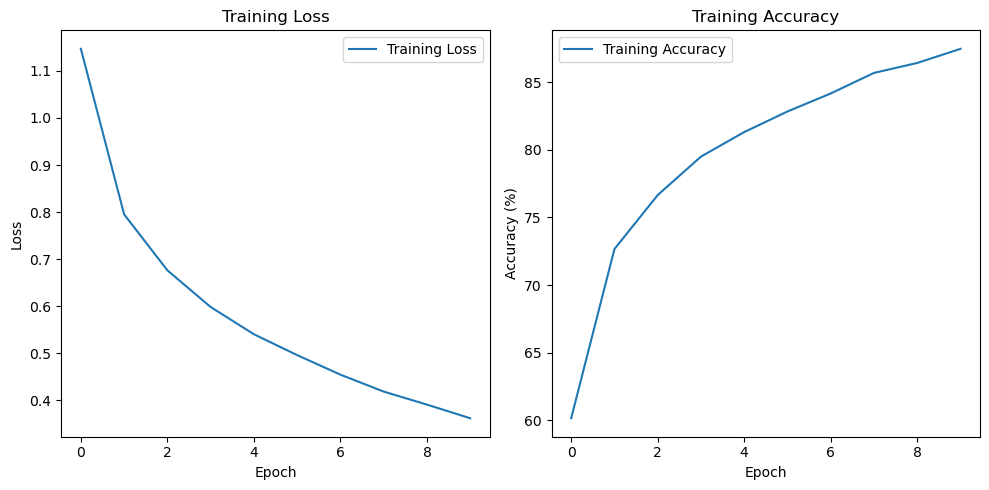

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Here we are plotting loss and accuracy

# Evaluation

In [8]:
correct = 0
total = 0
test_actuals = []
test_predictions = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_actuals.extend(labels.tolist())
        test_predictions.extend(predicted.tolist())

accuracy = 100 * correct / total
print('Accuracy of the network on the 10000 test images: %d %%' % accuracy)

Accuracy of the network on the 10000 test images: 82 %


In this part, we're checking how well our ResNet model performs on the test images. We go through each test image without updating the model's parameters. For each image, we compare the model's prediction with the actual label to see if it got it right. We keep track of the total number of correct predictions and the total number of images processed. Once we've checked all the test images, we calculate the accuracy by dividing the number of correct predictions by the total number of images and multiplying by 100. The accuracy of our model on the test dataset turns out to be 82%, indicating how accurately it can classify unseen images.

# Computing confusion matrix

In [9]:
conf_matrix = confusion_matrix(test_actuals, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[865  11  16  12  16   0   0   9  54  17]
 [ 15 896   2   2   0   1   0   2  19  63]
 [ 46   3 764  29  68  21  42  11  10   6]
 [ 19   8  56 644  48 137  43  20  15  10]
 [ 12   2  28  32 841  21  25  30   7   2]
 [  9   5  28 135  36 709  19  43   8   8]
 [  8   6  16  38  21  13 881   4   6   7]
 [ 15   0  17  18  35  35   5 859   4  12]
 [ 31  22   7   8   7   1   4   1 899  20]
 [ 32  42   4   6   1   3   1   1  14 896]]


The confusion matrix gives us a detailed view of how our ResNet model performed on each class in the test dataset. Each row represents the actual class, while each column shows the predicted class. High values along the diagonal mean accurate predictions, while off-diagonal values indicate misclassifications. By looking at this matrix, we can identify which classes our model struggles with and where it performs well, helping us understand its strengths and weaknesses.

# Classification Report

In [10]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_report = classification_report(test_actuals, test_predictions, target_names=class_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.86      0.84      1000
  automobile       0.90      0.90      0.90      1000
        bird       0.81      0.76      0.79      1000
         cat       0.70      0.64      0.67      1000
        deer       0.78      0.84      0.81      1000
         dog       0.75      0.71      0.73      1000
        frog       0.86      0.88      0.87      1000
       horse       0.88      0.86      0.87      1000
        ship       0.87      0.90      0.88      1000
       truck       0.86      0.90      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



The classification report summarizes the performance of our ResNet model on each class in the test dataset, providing metrics like precision, recall, and F1-score. Precision measures the accuracy of positive predictions, recall indicates the proportion of actual positives correctly identified, and the F1-score is a balance between precision and recall. Each class's support represents the number of samples in that class. The report shows that our model performs well overall, with an accuracy of 83%. It's especially good at distinguishing between automobiles, ships, and trucks. However, it struggles a bit with cats, dogs, and birds. This report gives us a clear understanding of how our model performs across different classes, helping us assess its strengths and weaknesses.

# Visualizing the Confusion Matrix

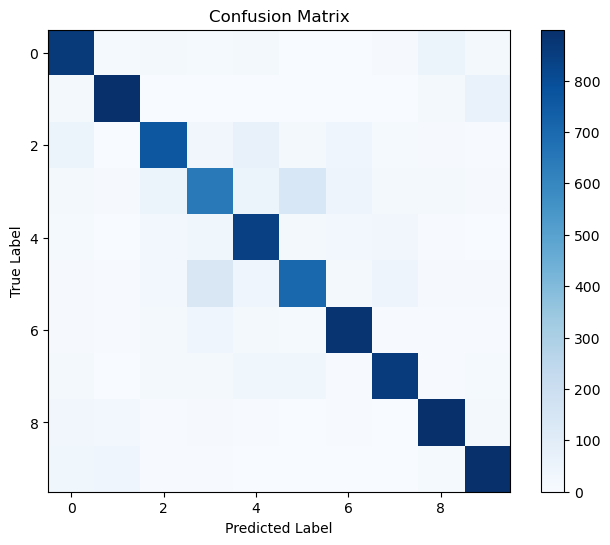

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Here we visualize confusion matrix

# we will see class wise accuracy

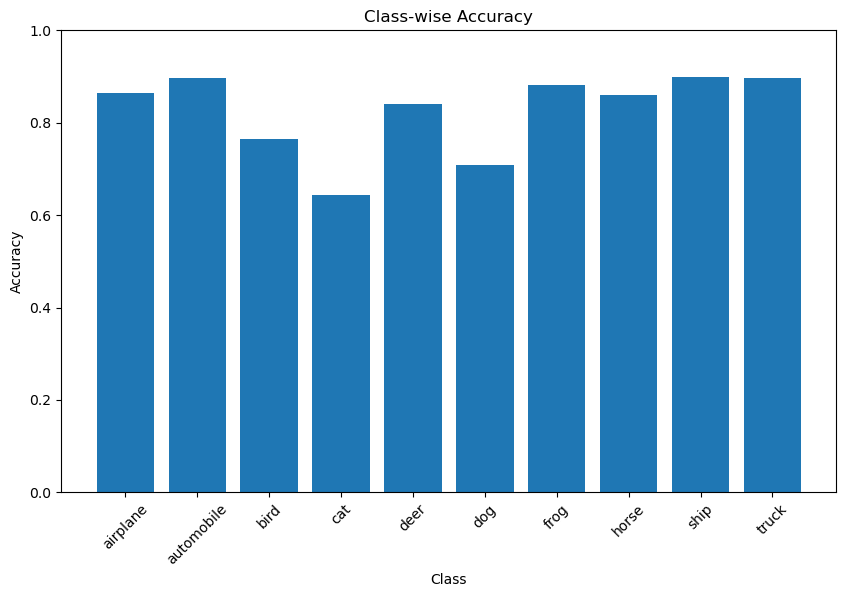

In [12]:
class_acc = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_acc)
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

This code generates a bar chart showing the accuracy of our ResNet model for each class in the CIFAR-10 dataset. It calculates class accuracy by dividing the diagonal elements of the confusion matrix (which represent correct predictions) by the total number of instances of each class. The resulting values are then plotted against the corresponding class labels. This visualization helps us identify which classes our model performs well on and which ones it struggles with, providing valuable insights into its performance across different categories.

# Function for Predicting Image Class

In [13]:
def predict_class(image_path, model, transform):
    model.eval()  # Set model to evaluation mode
    img = Image.open(image_path)
    img = transform(img).unsqueeze(0)
    with torch.no_grad():
        outputs = model(img)
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

This function takes an image file path, a trained model, and a transformation as input. It loads the image, applies the transformation, and passes it through the model to predict its class. The model is set to evaluation mode to ensure no gradients are calculated during inference. After obtaining the model's output, the function selects the class with the highest probability as the predicted class. Finally, it returns the predicted class label as an integer. This function allows us to conveniently make predictions on new images using our trained model.

# Defining the transformation

In [19]:
upload_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),           
    transforms.Normalize(            
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225]    
    )
])


This transformation prepares an image for upload to a pre-trained neural network model by resizing it to a square shape of 224x224 pixels, converting it to a tensor format, and then normalizing its pixel values. Normalization ensures that the pixel values have a mean of [0.485, 0.456, 0.406] and a standard deviation of [0.229, 0.224, 0.225], aligning the image's statistics with those of the data the model was trained on. This transformation ensures consistency and compatibility between the uploaded images and the model's requirements, facilitating accurate predictions.

# Try on some examples

Predicted Class: airplane


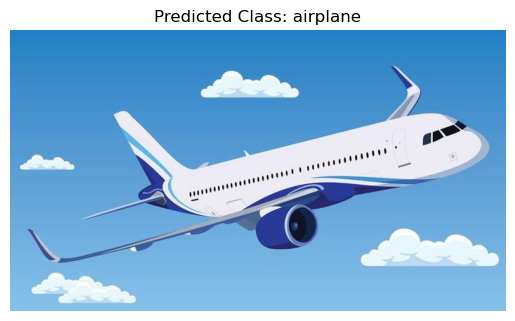

In [46]:
image_path = r"C:\Users\pbaniya\Desktop\Bonus_DL\Photo1.jpg"
predicted_class = predict_class(image_path, model_resnet, upload_transform)
predicted_label = class_labels[predicted_class]
print("Predicted Class:", predicted_label)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: " + predicted_label)
plt.show()


Predicted Class: cat


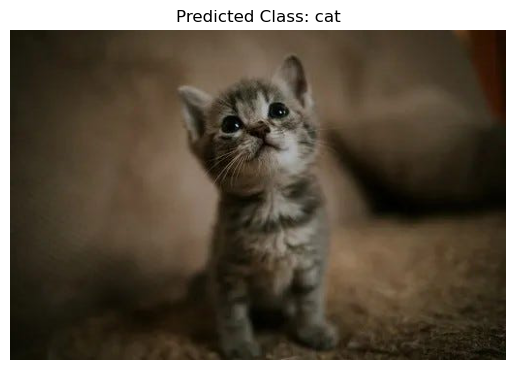

In [45]:
image_path = r"C:\Users\pbaniya\Desktop\Bonus_DL\Photo2.jpg"
predicted_class = predict_class(image_path, model_resnet, upload_transform)
predicted_label = class_labels[predicted_class]
print("Predicted Class:", predicted_label)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: " + predicted_label)
plt.show()

Predicted Class: ship


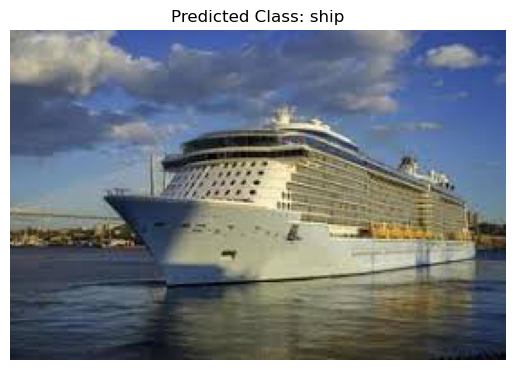

In [36]:
image_path = r"C:\Users\pbaniya\Desktop\Bonus_DL\Photo3.jpg"
predicted_class = predict_class(image_path, model_resnet, upload_transform)
predicted_label = class_labels[predicted_class]
print("Predicted Class:", predicted_label)

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: " + predicted_label)
plt.show()